# MOBILE PRICE PREDICTION

# Objective
Our objective is to predict the price range of a mobile phone by building a model that takes into account various features provided in the dataset.

# What Problem We Have?
Our task is to perform a classification on the target variable "Price Range" based on the data and attribute information. To achieve the best possible classification, we will develop a model that accurately predicts the price range of mobile phones.

# Dataset Description


|       | **Attribute** | **Information** |
| :---  |     :---      |       :---      |      
| **1** | battery_power | Total energy a battery can store in one time measured in (mAh) |                
| **2** | blue | Has bluetooth or not |                        
| **3** | clock_speed | Speed at which microprocessor executes instructions |
| **4** | dual_sim | Has dual sim support or not |
| **5** | fc | Front camera (Megapixels) |                     
| **6** | four_g | Has 4G or not |
| **7** | int_memory | Internal memory in (Gigabytes) |              
| **8** | m_dep | Mobile depth in (Cm)  |                      
| **9** | mobile_wt |  Weight of mobile phone |
| **10** | pc | Primary camera (Megapixels) |
| **11** | px_height | Pixel resolution height |                      
| **12** | px_width | Pixel resolution width |
| **13** | ram | Random access memory in (Megabytes)  |              
| **14** | sc_h | Screen height of mobile in (Cm)  |                      
| **15** | sc_w | Screen width of mobile in (Cm) |
| **16** | talk_time | Longest time that a single battery charge will last when you are constantly talking on the phone |
| **17** | three_g | Has 3G or not |                      
| **18** | touch_screen | Has touch screen or not | 
| **19** | wifi | Has wifi or not |              
| **20** | n_cores | Number of cores of processor |                       
| **21** | **price_range** | This is the Target variable with value of **0: (Low Cost**), **1: (Medium Cost**), **2: (High Cost**), and **3: (Very High Cost**) |

In [75]:
# importing  all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# data splitting
from sklearn.model_selection import train_test_split

# data modeling
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Model performance
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.model_selection import  KFold, cross_val_score, StratifiedKFold

from sklearn import metrics
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import StandardScaler, MinMaxScaler

import warnings
warnings.filterwarnings("ignore")

from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, classification_report, roc_curve , accuracy_score

In [3]:
# Loading the dataset
data = pd.read_csv('data3.csv')
#Return the first 5 rows of the DataFrame
data


,Unnamed: 0,battery_power,bluetooth,clock_speed,dual_sim,front_camera,four_g,int_memory,m_dep,mobile_wt,...,px_height,px_width,ram,screen_height,screen_width,talk_time,three_g,touch_screen,wifi,price_range
0,0,842,no,2.2,no,1,no,7,0.6,188,...,20.0,756,2549,9,7.000000,19,no,no,yes,medium_cost
1,1,1021,yes,0.5,yes,0,yes,53,0.7,136,...,905.0,1988,2631,17,3.000000,7,yes,yes,no,high_cost
2,2,563,yes,0.5,yes,2,yes,41,0.9,145,...,1263.0,1716,2603,11,2.000000,9,yes,yes,no,high_cost
3,3,615,yes,2.5,no,0,no,10,0.8,131,...,1216.0,1786,2769,16,8.000000,11,yes,no,no,high_cost
4,4,1821,yes,1.2,no,13,yes,44,0.6,141,...,1208.0,1212,1411,8,2.000000,15,yes,yes,no,medium_cost
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2995,1700,yes,1.9,no,0,yes,54,0.5,170,...,644.0,913,2121,14,8.000000,15,yes,yes,no,NaN
2996,2996,609,no,1.8,yes,0,no,13,0.9,186,...,1152.0,1632,1933,8,1.000000,19,no,yes,yes,NaN
2997,2997,1185,no,1.4,no,1,yes,8,0.5,80,...,477.0,825,1223,5,5.616667,14,yes,no,no,NaN
2998,2998,1533,yes,0.5,yes,0,no,50,0.4,171,...,38.0,832,2509,15,11.000000,6,no,yes,no,NaN


In [48]:
df= pd.read_csv('trainf.csv')
df1=pd.read_csv('testf.csv')

In [218]:
px_mask = df['px_height'] == 0
sc_mask = df['screen_width'] == 0
print(f'pixel height = 0  :  {sum(px_mask)}')
print(f'screen width = 0  :  {sum(sc_mask)}')

pixel height = 0  :  0
screen width = 0  :  0


In [220]:
df=df[df['screen_width']>=2]
df=df[df['px_height']>0]
df.reset_index(inplace=True)
df.drop('index', axis=1, inplace=True)
# df

In [4]:
data.drop(['Unnamed: 0'], axis=1, inplace=True)
data

,battery_power,bluetooth,clock_speed,dual_sim,front_camera,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,screen_height,screen_width,talk_time,three_g,touch_screen,wifi,price_range
0,842,no,2.2,no,1,no,7,0.6,188,2,...,20.0,756,2549,9,7.000000,19,no,no,yes,medium_cost
1,1021,yes,0.5,yes,0,yes,53,0.7,136,3,...,905.0,1988,2631,17,3.000000,7,yes,yes,no,high_cost
2,563,yes,0.5,yes,2,yes,41,0.9,145,5,...,1263.0,1716,2603,11,2.000000,9,yes,yes,no,high_cost
3,615,yes,2.5,no,0,no,10,0.8,131,6,...,1216.0,1786,2769,16,8.000000,11,yes,no,no,high_cost
4,1821,yes,1.2,no,13,yes,44,0.6,141,2,...,1208.0,1212,1411,8,2.000000,15,yes,yes,no,medium_cost
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,1700,yes,1.9,no,0,yes,54,0.5,170,7,...,644.0,913,2121,14,8.000000,15,yes,yes,no,NaN
2996,609,no,1.8,yes,0,no,13,0.9,186,4,...,1152.0,1632,1933,8,1.000000,19,no,yes,yes,NaN
2997,1185,no,1.4,no,1,yes,8,0.5,80,1,...,477.0,825,1223,5,5.616667,14,yes,no,no,NaN
2998,1533,yes,0.5,yes,0,no,50,0.4,171,2,...,38.0,832,2509,15,11.000000,6,no,yes,no,NaN


In [5]:
data.columns

Index(['battery_power', 'bluetooth', 'clock_speed', 'dual_sim', 'front_camera',
       'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores',
       'primary_camera', 'px_height', 'px_width', 'ram', 'screen_height',
       'screen_width', 'talk_time', 'three_g', 'touch_screen', 'wifi',
       'price_range'],
      dtype='object')

In [7]:
data.rename(columns={"blue": "bluetooth", "fc": "front_camera", "pc": "primary_camera", 
                         "sc_h": "screen_height", "sc_w": "screen_width"}, inplace=True)

print("Column names after renaming:", data.columns)

Column names after renaming: Index(['battery_power', 'bluetooth', 'clock_speed', 'dual_sim', 'front_camera',
       'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores',
       'primary_camera', 'px_height', 'px_width', 'ram', 'screen_height',
       'screen_width', 'talk_time', 'three_g', 'touch_screen', 'wifi',
       'price_range'],
      dtype='object')


In [8]:
num_rows = data.shape[0]
num_columns = data.shape[1]

print("Number of rows:", num_rows)
print("Number of columns:", num_columns)

Number of rows: 3000
Number of columns: 21


In [9]:
data.isna().sum()

battery_power        0
bluetooth            0
clock_speed          0
dual_sim             0
front_camera         0
four_g               0
int_memory           0
m_dep                0
mobile_wt            0
n_cores              0
primary_camera       0
px_height            0
px_width             0
ram                  0
screen_height        0
screen_width         0
talk_time            0
three_g              0
touch_screen         0
wifi                 0
price_range       1000
dtype: int64

In [10]:
data.dtypes

battery_power       int64
bluetooth          object
clock_speed       float64
dual_sim           object
front_camera        int64
four_g             object
int_memory          int64
m_dep             float64
mobile_wt           int64
n_cores             int64
primary_camera      int64
px_height         float64
px_width            int64
ram                 int64
screen_height       int64
screen_width      float64
talk_time           int64
three_g            object
touch_screen       object
wifi               object
price_range        object
dtype: object

# Data Analysis

In [15]:
# Data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   battery_power   3000 non-null   int64  
 1   bluetooth       3000 non-null   object 
 2   clock_speed     3000 non-null   float64
 3   dual_sim        3000 non-null   object 
 4   front_camera    3000 non-null   int64  
 5   four_g          3000 non-null   object 
 6   int_memory      3000 non-null   int64  
 7   m_dep           3000 non-null   float64
 8   mobile_wt       3000 non-null   int64  
 9   n_cores         3000 non-null   int64  
 10  primary_camera  3000 non-null   int64  
 11  px_height       3000 non-null   float64
 12  px_width        3000 non-null   int64  
 13  ram             3000 non-null   int64  
 14  screen_height   3000 non-null   int64  
 15  screen_width    3000 non-null   float64
 16  talk_time       3000 non-null   int64  
 17  three_g         3000 non-null   o

In [16]:
#Description of the data
data.describe().T # transpose

,count,mean,std,min,25%,50%,75%,max
battery_power,3000.0,1241.849000,437.063804,500.0,863.75,1232.000000,1619.00,1999.0
clock_speed,3000.0,1.528467,0.820358,0.5,0.70,1.500000,2.30,3.0
front_camera,3000.0,4.404000,4.383742,0.0,1.00,3.000000,7.00,19.0
int_memory,3000.0,32.581667,18.152810,2.0,16.00,33.000000,48.00,64.0
m_dep,3000.0,0.507000,0.285969,0.1,0.20,0.500000,0.80,1.0
mobile_wt,3000.0,140.003000,35.213809,80.0,109.00,140.000000,170.00,200.0
n_cores,3000.0,4.456333,2.289361,1.0,2.00,4.000000,6.00,8.0
primary_camera,3000.0,9.962333,6.073923,0.0,5.00,10.000000,15.00,20.0
px_height,3000.0,639.964483,439.582929,1.0,280.00,565.500000,932.50,1960.0
px_width,3000.0,1247.601667,434.666168,500.0,865.00,1248.000000,1634.00,1998.0


In [12]:
# Total phones with screen width = 0
print(len(data[data.screen_width == 0]))
# Total phones with px_height = 0
print(len(data[data.px_height == 0]))

0
0


In [13]:
#where ther is sc_W and px_height is zero ,assigning mean values
data['screen_width'][data[data.screen_width == 0].index] = data.screen_width.mean()
data['px_height'][data[data.px_height == 0].index] = data.px_height.mean()

In [14]:
#checking whether there is duplicates or not
len(data[data.duplicated()])

0

# Data Preprocessing

Separating Target and Inputs variabels

In [17]:
Df = data.iloc[:, :20]
target = data.iloc[:, 20:21]

In [18]:
Df.dtypes

battery_power       int64
bluetooth          object
clock_speed       float64
dual_sim           object
front_camera        int64
four_g             object
int_memory          int64
m_dep             float64
mobile_wt           int64
n_cores             int64
primary_camera      int64
px_height         float64
px_width            int64
ram                 int64
screen_height       int64
screen_width      float64
talk_time           int64
three_g            object
touch_screen       object
wifi               object
dtype: object

In [19]:
target.dtypes

price_range    object
dtype: object

# Encoding categorical features

In [20]:
cdf=Df.select_dtypes(include='object')
cdf.head()

,bluetooth,dual_sim,four_g,three_g,touch_screen,wifi
0,no,no,no,no,no,yes
1,yes,yes,yes,yes,yes,no
2,yes,yes,yes,yes,yes,no
3,yes,no,no,yes,no,no
4,yes,no,yes,yes,yes,no


In [21]:
cdf.dtypes

bluetooth       object
dual_sim        object
four_g          object
three_g         object
touch_screen    object
wifi            object
dtype: object

Encoding nominal features

In [22]:
from sklearn.preprocessing import LabelEncoder
label_encoders = {}

# Encode each column in the DataFrame individually
encoded_cdf = cdf.copy()
for col in encoded_cdf.columns:
    le = LabelEncoder()
    encoded_cdf[col] = le.fit_transform(encoded_cdf[col])
    label_encoders[col] = le

In [23]:
encoded_cdf.head()

,bluetooth,dual_sim,four_g,three_g,touch_screen,wifi
0,0,0,0,0,0,1
1,1,1,1,1,1,0
2,1,1,1,1,1,0
3,1,0,0,1,0,0
4,1,0,1,1,1,0


In [24]:
cdf.head()

,bluetooth,dual_sim,four_g,three_g,touch_screen,wifi
0,no,no,no,no,no,yes
1,yes,yes,yes,yes,yes,no
2,yes,yes,yes,yes,yes,no
3,yes,no,no,yes,no,no
4,yes,no,yes,yes,yes,no


# Seperating numerical features

In [25]:
ndf=Df.select_dtypes(exclude='object')
ndf

,battery_power,clock_speed,front_camera,int_memory,m_dep,mobile_wt,n_cores,primary_camera,px_height,px_width,ram,screen_height,screen_width,talk_time
0,842,2.2,1,7,0.6,188,2,2,20.0,756,2549,9,7.000000,19
1,1021,0.5,0,53,0.7,136,3,6,905.0,1988,2631,17,3.000000,7
2,563,0.5,2,41,0.9,145,5,6,1263.0,1716,2603,11,2.000000,9
3,615,2.5,0,10,0.8,131,6,9,1216.0,1786,2769,16,8.000000,11
4,1821,1.2,13,44,0.6,141,2,14,1208.0,1212,1411,8,2.000000,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,1700,1.9,0,54,0.5,170,7,17,644.0,913,2121,14,8.000000,15
2996,609,1.8,0,13,0.9,186,4,2,1152.0,1632,1933,8,1.000000,19
2997,1185,1.4,1,8,0.5,80,1,12,477.0,825,1223,5,5.616667,14
2998,1533,0.5,0,50,0.4,171,2,12,38.0,832,2509,15,11.000000,6


In [26]:
ndf.isnull().sum()

battery_power     0
clock_speed       0
front_camera      0
int_memory        0
m_dep             0
mobile_wt         0
n_cores           0
primary_camera    0
px_height         0
px_width          0
ram               0
screen_height     0
screen_width      0
talk_time         0
dtype: int64

# Outlier Detection

 Checking Outliers in Numerical Features

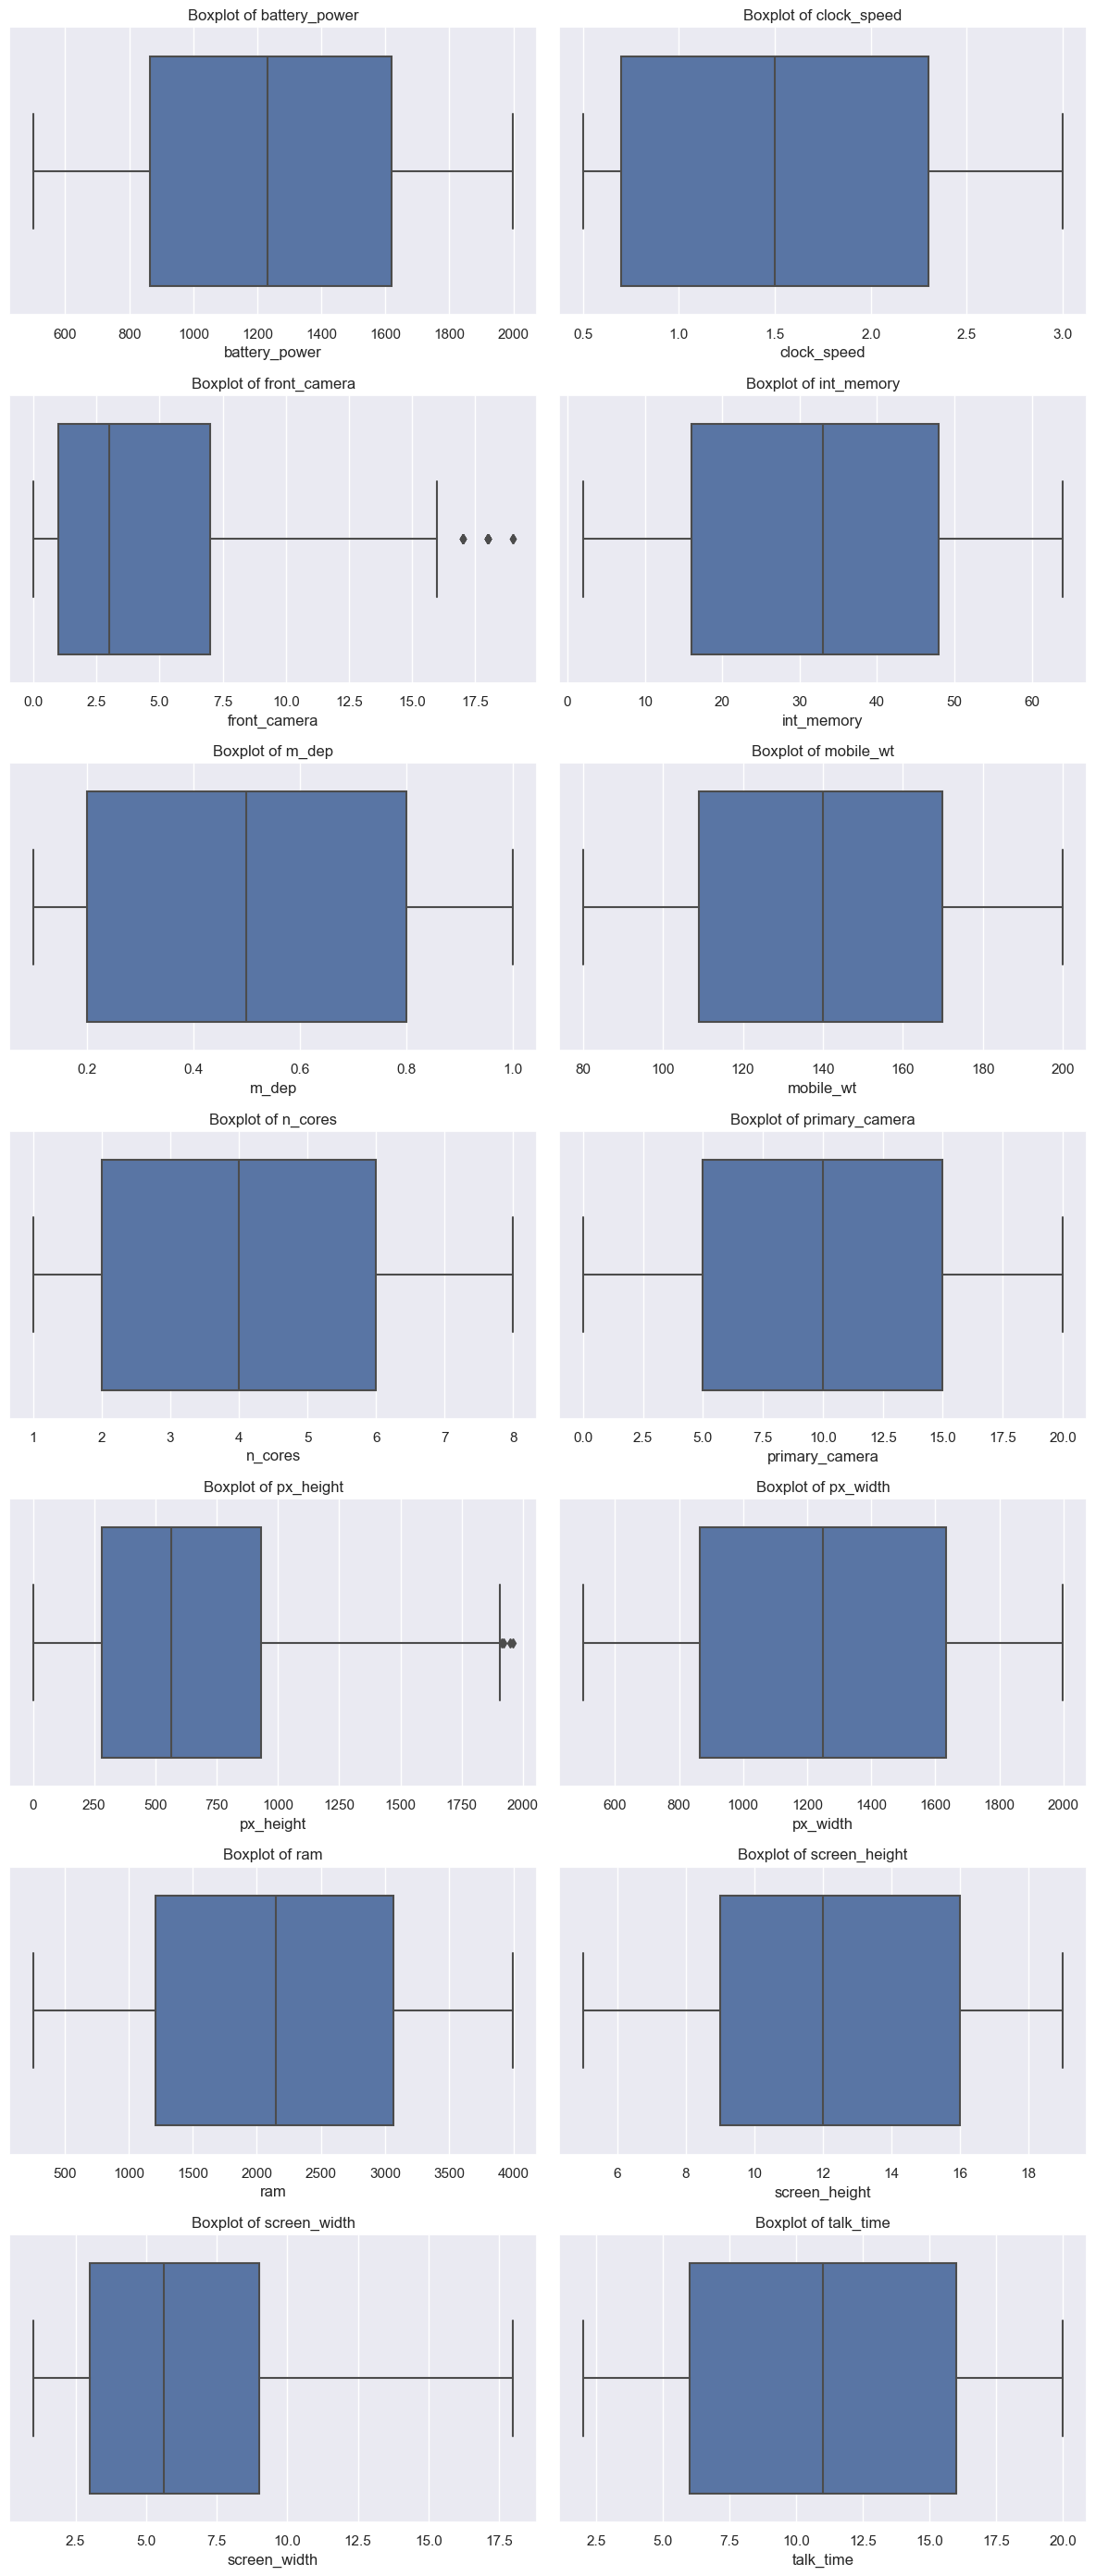

In [27]:
sns.set_theme()
features = [
    'battery_power', 'clock_speed', 'front_camera', 'int_memory', 'm_dep', 'mobile_wt',
    'n_cores', 'primary_camera', 'px_height', 'px_width', 'ram', 'screen_height',
    'screen_width', 'talk_time'
]

fig, ax = plt.subplots(ncols=2, nrows=7, figsize=(12, 28))
for i, feature in enumerate(features):
    row = i // 2  
    col = i % 2   
    sns.boxplot(x=ndf[feature], ax=ax[row, col]) 
    ax[row, col].set_title(f'Boxplot of {feature}')  

plt.tight_layout()  
plt.show()


we can see the outliers in front_camera

# Remove outliers using IQR method

In [28]:
# front_camera
Q1=ndf.front_camera.quantile(0.25)
Q3=ndf.front_camera.quantile(0.75)

# #Find IQR
IQR = Q3-Q1
IQR
# #Set lowerlimit and upperlimit using Q1,Q3 and IQR

lowerlimit= Q1-(1.5*IQR)
upperlimit=Q3+(1.5*IQR)

# #Print Dataframe's shape before removing outliers
print("Before removing, the dataframe's shape", ndf.shape)

# #Remove outlier and save the result in rdf
removedf1=ndf[(ndf.front_camera >= lowerlimit) & (ndf.front_camera <= upperlimit)]

#print(shape of datafrme after after removing outlier)
print("DataFrame after removing outliers: ", removedf1.shape)

Before removing, the dataframe's shape (3000, 14)
DataFrame after removing outliers:  (2968, 14)


# Save removed records

In [29]:
ddf = ndf[(ndf.front_camera > upperlimit) | (ndf.front_camera < lowerlimit)]
# #Check deleted records
# ddf.index#indexes removed
ddf.shape

(32, 14)

Removing outliers form numerical data

In [30]:
ndf.drop(ddf.index, axis=0, inplace=True)
ndf
ndf.reset_index(drop=True)

,battery_power,clock_speed,front_camera,int_memory,m_dep,mobile_wt,n_cores,primary_camera,px_height,px_width,ram,screen_height,screen_width,talk_time
0,842,2.2,1,7,0.6,188,2,2,20.0,756,2549,9,7.000000,19
1,1021,0.5,0,53,0.7,136,3,6,905.0,1988,2631,17,3.000000,7
2,563,0.5,2,41,0.9,145,5,6,1263.0,1716,2603,11,2.000000,9
3,615,2.5,0,10,0.8,131,6,9,1216.0,1786,2769,16,8.000000,11
4,1821,1.2,13,44,0.6,141,2,14,1208.0,1212,1411,8,2.000000,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2963,1700,1.9,0,54,0.5,170,7,17,644.0,913,2121,14,8.000000,15
2964,609,1.8,0,13,0.9,186,4,2,1152.0,1632,1933,8,1.000000,19
2965,1185,1.4,1,8,0.5,80,1,12,477.0,825,1223,5,5.616667,14
2966,1533,0.5,0,50,0.4,171,2,12,38.0,832,2509,15,11.000000,6


front_camera after removing the outliers

<Axes: xlabel='front_camera'>

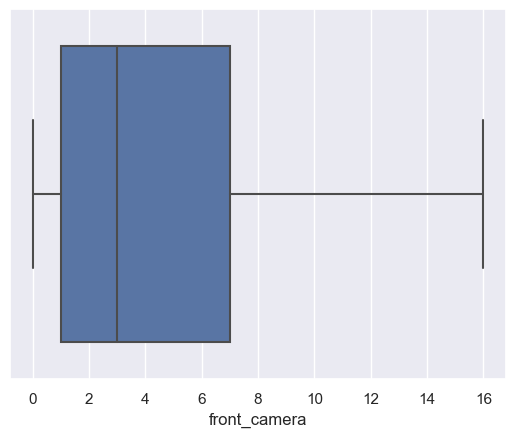

In [31]:
sns.set_theme()
sns.boxplot(x=ndf.front_camera)

In [32]:
encoded_cdf.drop(ddf.index, axis=0, inplace=True)
encoded_cdf
encoded_cdf.reset_index(drop=True)

,bluetooth,dual_sim,four_g,three_g,touch_screen,wifi
0,0,0,0,0,0,1
1,1,1,1,1,1,0
2,1,1,1,1,1,0
3,1,0,0,1,0,0
4,1,0,1,1,1,0
...,...,...,...,...,...,...
2963,1,0,1,1,1,0
2964,0,1,0,0,1,1
2965,0,0,1,1,0,0
2966,1,1,0,0,1,0


# Feature Transformation

(array([326., 269., 280., 308., 286., 308., 307., 283., 299., 302.]),
 array([ 256. ,  630.2, 1004.4, 1378.6, 1752.8, 2127. , 2501.2, 2875.4,
        3249.6, 3623.8, 3998. ]),
 <BarContainer object of 10 artists>)

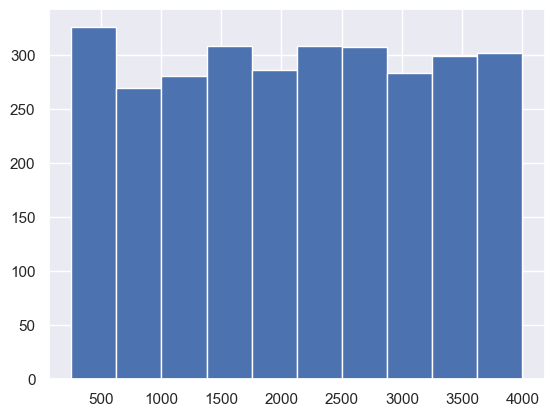

In [33]:
sns.set_theme()
x=np.squeeze(ndf.ram)
plt.hist(x)

(array([143., 190., 201., 210., 284., 315., 368., 384., 404., 469.]),
 array([16.        , 20.72297398, 25.44594797, 30.16892195, 34.89189594,
        39.61486992, 44.3378439 , 49.06081789, 53.78379187, 58.50676585,
        63.22973984]),
 <BarContainer object of 10 artists>)

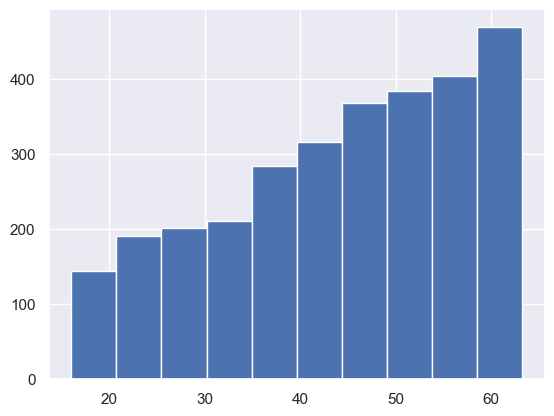

In [34]:
x=np.sqrt(ndf.ram)
plt.hist(x)

(array([ 69.,  88., 115., 156., 170., 237., 348., 430., 599., 756.]),
 array([5.54517744, 5.82001465, 6.09485186, 6.36968907, 6.64452627,
        6.91936348, 7.19420069, 7.46903789, 7.7438751 , 8.01871231,
        8.29354952]),
 <BarContainer object of 10 artists>)

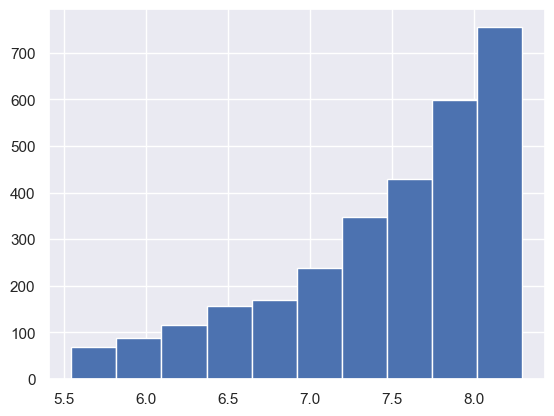

In [35]:
x=np.log(ndf.ram)
plt.hist(x)

# Use MinMax Scaler (Normalization)

In [36]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler(feature_range=(0,1))
numeric=scaler.fit_transform(ndf)

mdf=pd.DataFrame(numeric, columns=ndf.columns)
mdf.shape

(2968, 14)

In [37]:
mdf.shape

(2968, 14)

# Imputing target feature

In [38]:
target.isna().sum()

price_range    1000
dtype: int64

Imputing target 

In [40]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
target = imputer.fit_transform(data[['price_range']])
target_df = pd.DataFrame(target, columns=['price_range'])
target_df.tail()

,price_range
2995,high_cost
2996,high_cost
2997,high_cost
2998,high_cost
2999,high_cost


In [41]:
target_df['price_range'].unique()

array(['medium_cost', 'high_cost', 'very_high_cost', 'low_cost'],
      dtype=object)

# Encoding Target feature

In [42]:
# Since the target class is ordinal we can't use label encoder
cost_order = ['low_cost', 'medium_cost', 'high_cost', 'very_high_cost']
from sklearn.preprocessing import OrdinalEncoder

# Assuming the original 'price_range' is still categorical
encoder = OrdinalEncoder(categories=[cost_order])
encoded_target_sklearn = encoder.fit_transform(target_df[['price_range']])

# Convert to DataFrame for similar structure
encoded_target_df = pd.DataFrame(encoded_target_sklearn, columns=['price_range'])
print("Encoded ordinal target DataFrame (scikit-learn):")
encoded_target_df.head()

Encoded ordinal target DataFrame (scikit-learn):


,price_range
0,1.0
1,2.0
2,2.0
3,2.0
4,1.0


In [43]:
encoded_target_df.head()

,price_range
0,1.0
1,2.0
2,2.0
3,2.0
4,1.0


In [44]:
encoded_target_df.drop(ddf.index, axis=0, inplace=True)
encoded_target_df.reset_index(drop=True)

,price_range
0,1.0
1,2.0
2,2.0
3,2.0
4,1.0
...,...
2963,2.0
2964,2.0
2965,2.0
2966,2.0


In [45]:
mdf.drop(ddf.index, axis=0, inplace=True)
mdf.reset_index(drop=True)

,battery_power,clock_speed,front_camera,int_memory,m_dep,mobile_wt,n_cores,primary_camera,px_height,px_width,ram,screen_height,screen_width,talk_time
0,0.228152,0.68,0.0625,0.080645,0.555556,0.900000,0.142857,0.10,0.009699,0.170895,0.612774,0.285714,0.352941,0.944444
1,0.347565,0.00,0.0000,0.822581,0.666667,0.466667,0.285714,0.30,0.461460,0.993324,0.634687,0.857143,0.117647,0.277778
2,0.042028,0.00,0.1250,0.629032,0.888889,0.541667,0.571429,0.30,0.644206,0.811749,0.627205,0.428571,0.058824,0.388889
3,0.076718,0.80,0.0000,0.129032,0.777778,0.425000,0.714286,0.45,0.620214,0.858478,0.671566,0.785714,0.411765,0.500000
4,0.881254,0.28,0.8125,0.677419,0.555556,0.508333,0.142857,0.70,0.616131,0.475300,0.308658,0.214286,0.058824,0.722222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2931,0.800534,0.56,0.0000,0.838710,0.444444,0.750000,0.857143,0.85,0.328229,0.275701,0.498397,0.642857,0.411765,0.722222
2932,0.072715,0.52,0.0000,0.177419,0.888889,0.883333,0.428571,0.10,0.587545,0.755674,0.448156,0.214286,0.000000,0.944444
2933,0.456971,0.36,0.0625,0.096774,0.444444,0.000000,0.000000,0.60,0.242981,0.216956,0.258418,0.000000,0.271569,0.666667
2934,0.689126,0.00,0.0000,0.774194,0.333333,0.758333,0.142857,0.60,0.018887,0.221629,0.602084,0.714286,0.588235,0.222222


# Combining categorical and numerical features

In [46]:
alldf = pd.concat([encoded_cdf, ndf,encoded_target_df], axis=1)

In [47]:
alldf.shape

(2968, 21)

# Correlation between all features

<Axes: >

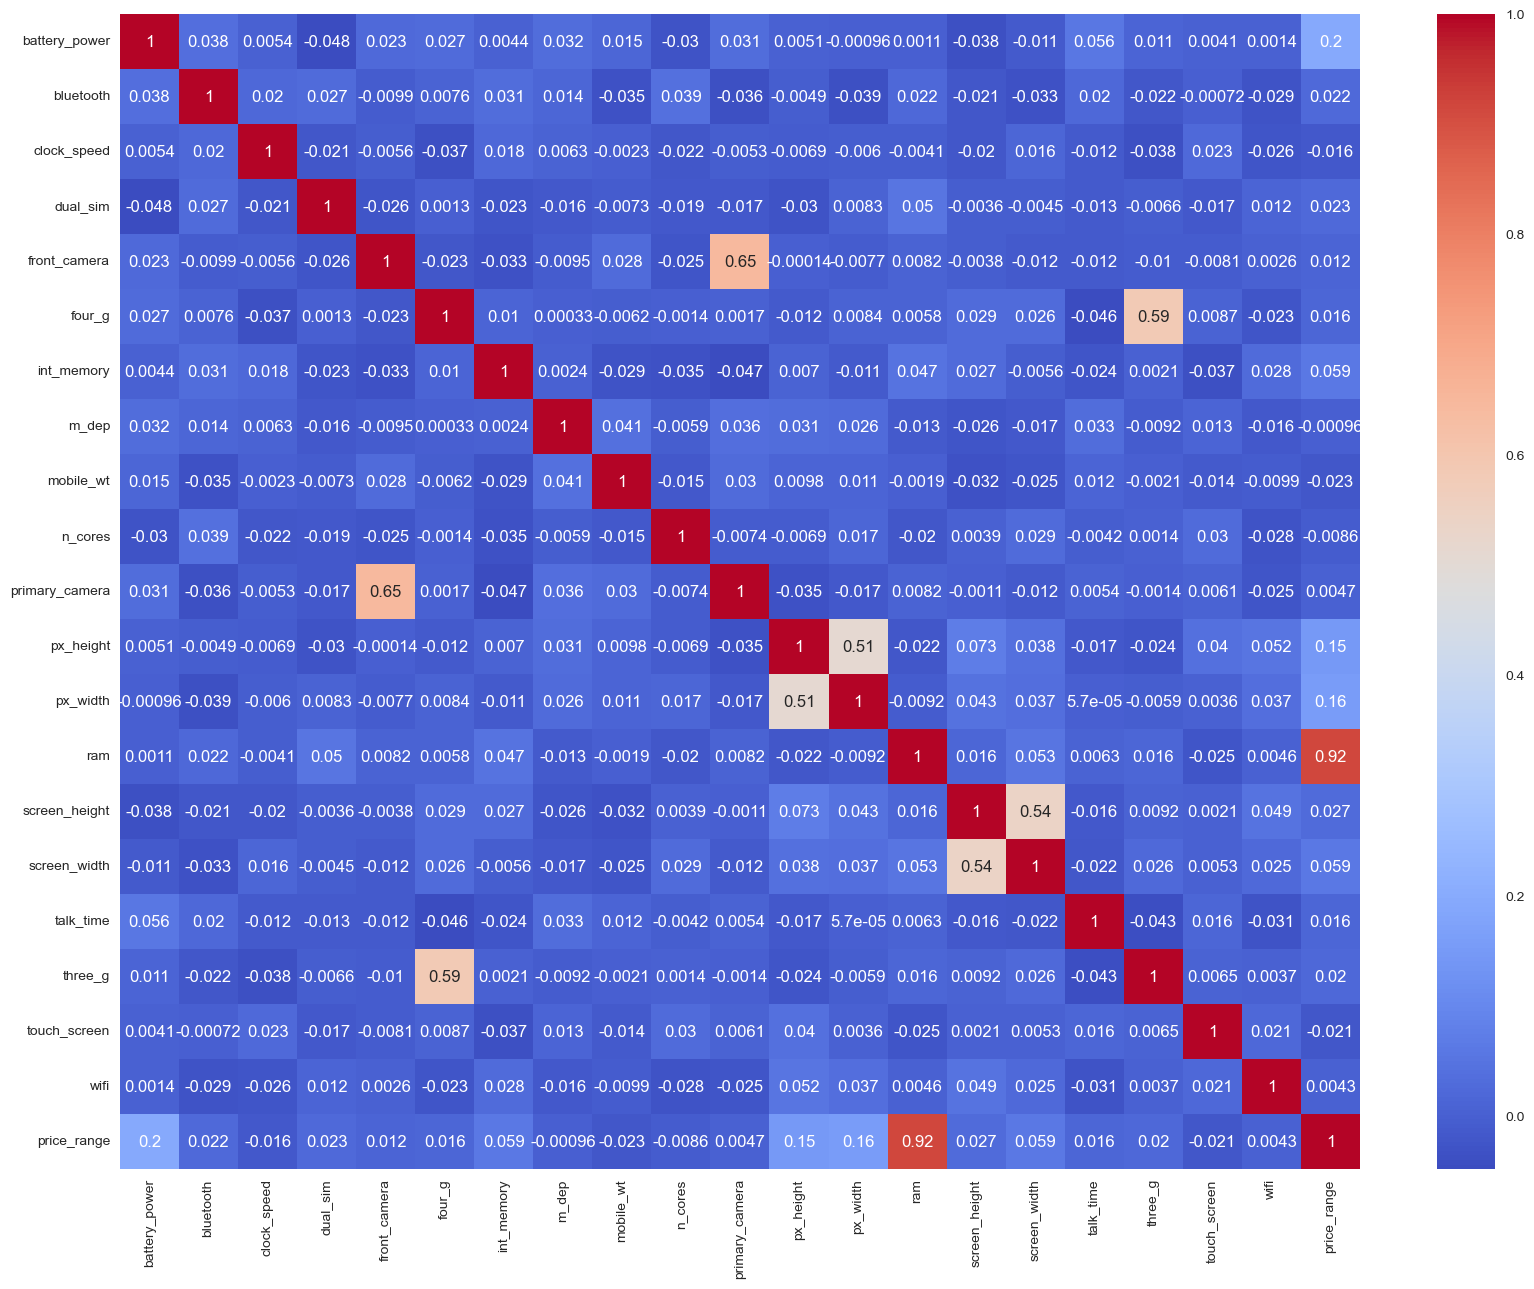

In [245]:
#Correlation between all features
correlation = df.corr()
plt.figure(figsize = [20, 15])
sns.heatmap(correlation, cmap = 'coolwarm', annot = True)

In [246]:
# better to inspect the correlation of price_range vs. features specifically
price_range_corr = df.corr().sort_values(by = ["price_range"],
                                                 ascending = False).iloc[0].sort_values(ascending = False)
price_range_corr

price_range       1.000000
ram               0.917330
battery_power     0.196288
px_width          0.155291
px_height         0.145118
int_memory        0.058975
screen_width      0.058899
screen_height     0.027184
dual_sim          0.022609
bluetooth         0.022046
three_g           0.019767
talk_time         0.015909
four_g            0.015621
front_camera      0.012357
primary_camera    0.004713
wifi              0.004313
m_dep            -0.000956
n_cores          -0.008647
clock_speed      -0.016139
touch_screen     -0.020838
mobile_wt        -0.022835
Name: price_range, dtype: float64

# Model Training 

# 1. Decision Tree model

In [323]:
from sklearn.tree import DecisionTreeClassifier

# independant variables
x=df.drop(["price_range"],axis=1)
y = df["price_range"].values.reshape(-1,1)  #target
# print('shape of x : {} \nshape of y : {}'.format(x.shape , y.shape))

In [248]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.1 , random_state = 0)

DTs = DecisionTreeClassifier(max_depth =14, criterion='gini',random_state = 0)
DTs = DTs.fit(x_train,y_train)
y_pred = DTs.predict(x_test)

In [249]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score

def Report(y_test, y_pred):
    print('Accuracy : {}% \n'.format(accuracy_score(y_test, y_pred) * 100))
    print('Confusion Matrix : \n\n{}\n'.format(confusion_matrix(y_test, y_pred)))
    print('Classification Report : \n\n{}'.format(classification_report(y_test, y_pred)))

def multi_class_metrics(y_true, y_pred):
    print(f'Accuracy  : ', round(accuracy_score(y_true, y_pred), 3))
    print(f'Precision : ', round(precision_score(y_true, y_pred, average='micro'), 3))
    print(f'Recall    : ', round(recall_score(y_true, y_pred, average='micro'), 3))
    print(f'f1        : ', round(f1_score(y_true, y_pred, average='micro'), 3))

# Assuming y_test and y_pred are defined
Report(y_test, y_pred)


Accuracy : 84.472049689441% 

Confusion Matrix : 

[[35  5  0  0]
 [ 3 29  6  0]
 [ 0  7 30  2]
 [ 0  0  2 42]]

Classification Report : 

              precision    recall  f1-score   support

           0       0.92      0.88      0.90        40
           1       0.71      0.76      0.73        38
           2       0.79      0.77      0.78        39
           3       0.95      0.95      0.95        44

    accuracy                           0.84       161
   macro avg       0.84      0.84      0.84       161
weighted avg       0.85      0.84      0.85       161



In [250]:
print('f1 score is:', metrics.f1_score(y_test, y_pred,average="macro"))

f1 score is: 0.8413448365980012


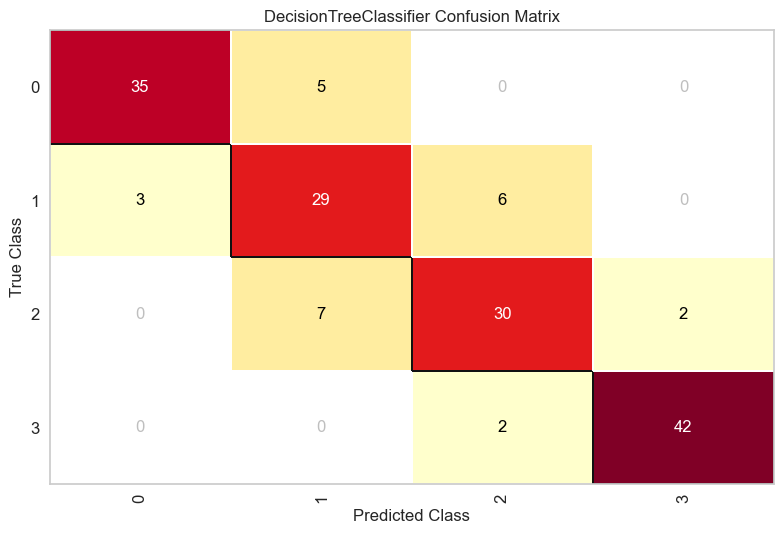

<Axes: title={'center': 'DecisionTreeClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [251]:
from yellowbrick.classifier import ConfusionMatrix

cm = ConfusionMatrix(
    DTs, classes=[0,1,2,3])


cm.fit(x_train, y_train)
cm.score(x_test, y_test)

cm.poof()

- DTs model predict 42+30+29+35= 136 samples correctly.
- DTs model predict 2+2+7+6+3+5= 25 samples incorectly 

In [252]:
# pip install yellowbrick

# - Using cross validation

In [324]:
def Perform_cross_val(model, k, x, y, scoring):
#     """
#     perform cross validation
#         model: model
#         k(scaler): the value for n_splits in KFold()
#         x(DataFrame or array):  x_train
#         y(DataFrame or array): y_train
#         scoring(string): an approach for evaluation in cross validation
#     """

    kf = StratifiedKFold(n_splits=k)
    cv_results = cross_val_score(model, x, y.ravel(), cv=kf, scoring=scoring)
    cv_mean = np.mean(cv_results)
    
    print('-'*20, f"CV for k={k}, scoring={scoring}", '-'*20)
    print(f"CV mean: {cv_mean}")
    print(f"CV results: {cv_results}\n")

In [254]:
# Check cross validation on DTs model to estimate model performance (Accuracy)
# use MinMaxScaler
from sklearn.pipeline import Pipeline

pipe1 = Pipeline([('scaler', MinMaxScaler()), ('DTs', DecisionTreeClassifier())])
Perform_cross_val(pipe1, k=5, x=x_train, y=y_train, scoring='accuracy')

-------------------- CV for k=5, scoring=accuracy --------------------
CV mean: 0.821839875909796
CV results: [0.81724138 0.79655172 0.82758621 0.8200692  0.84775087]



# -Using GridSearchCV

To apply DTs algorithm firstly we used GridSearchCV method to tune parameters. Some parameters are given below.

In [255]:
DTs2 = DecisionTreeClassifier()

In [256]:
max_depth = range(2,21,1)
criterion = ['entropy', 'gini']
min_samples_leaf:range(1,15,1)
min_samples_split:range(2,20,1)     
random_state =range(0,1)

parameters = {'max_depth': max_depth , 'criterion':criterion ,"min_samples_leaf":range(1,15,1),
              "min_samples_split":range(2,20,1),'random_state':random_state}
gridsearch = GridSearchCV(estimator = DTs2,
                         param_grid = parameters,
                         scoring = 'accuracy',
                         cv = 5,
                         verbose = 1,
                         n_jobs = -1)
gridsearch.fit(x_train,y_train)
print(gridsearch.best_params_)

Fitting 5 folds for each of 9576 candidates, totalling 47880 fits
{'criterion': 'gini', 'max_depth': 9, 'min_samples_leaf': 7, 'min_samples_split': 16, 'random_state': 0}


In [257]:
DTs2 = DecisionTreeClassifier(criterion='gini', max_depth= 9, min_samples_leaf= 7, min_samples_split= 16, random_state= 0)
DTs2 = DTs2.fit(x_train,y_train)
y_pred = DTs2.predict(x_test)

In [258]:
# Evaluation
Report(y_test , y_pred)


Accuracy : 88.19875776397515% 

Confusion Matrix : 

[[37  3  0  0]
 [ 4 32  2  0]
 [ 0  7 31  1]
 [ 0  0  2 42]]

Classification Report : 

              precision    recall  f1-score   support

           0       0.90      0.93      0.91        40
           1       0.76      0.84      0.80        38
           2       0.89      0.79      0.84        39
           3       0.98      0.95      0.97        44

    accuracy                           0.88       161
   macro avg       0.88      0.88      0.88       161
weighted avg       0.89      0.88      0.88       161



In [259]:
print('f1 score is:', metrics.f1_score(y_test, y_pred,average="macro"))

f1 score is: 0.8792338315326821


- score of model increase after use Grid search CV parameters 

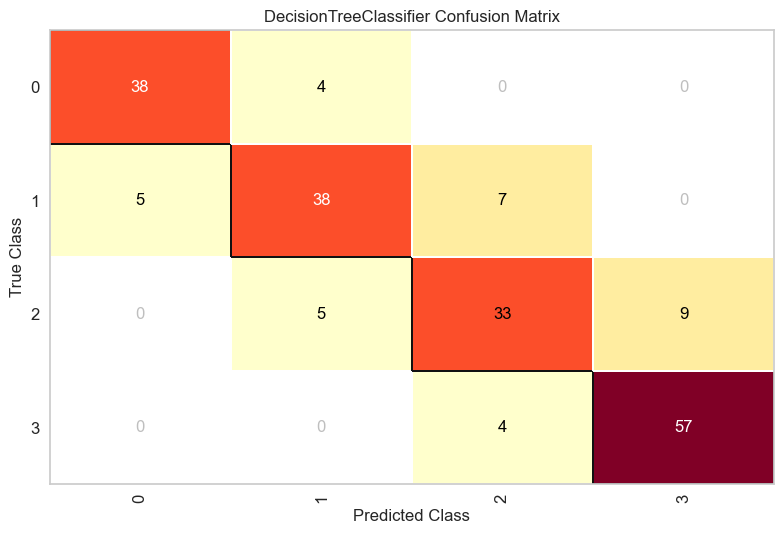

<Axes: title={'center': 'DecisionTreeClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [79]:
from yellowbrick.classifier import ConfusionMatrix

cm = ConfusionMatrix(
    DTs2, classes=[0,1,2,3])


cm.fit(x_train, y_train)
cm.score(x_test, y_test)

cm.poof()

- DTs2 model predict 42+31+32+37= 142 samples correctly.

- DTs2 model predict 2+2+7+6+3+5= 19 samples uncorectly 

- Best Decision Tree : DTs2
    
* Hyperparameters : criterion='gini', max_depth= 9, min_samples_leaf= 7, min_samples_split= 16, random_state= 0
* Accuracy = 88.20%

# 2. Random Forest(RF)

In [260]:
# independant variables
x=df.drop(["price_range"],axis=1)
y = df["price_range"].values.reshape(-1,1)  #target
print('shape of x : {} \nshape of y : {}'.format(x.shape , y.shape))

shape of x : (1609, 20) 
shape of y : (1609, 1)


In [261]:
#split X and y in training and test set in 90:10 ratio
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.1 , random_state = 0)
print('shape of x_train :',x_train.shape)
print('shape of y_train :',y_train.shape)
print('shape of x_test :',x_test.shape)
print('shape of y_test :',y_test.shape)

shape of x_train : (1448, 20)
shape of y_train : (1448, 1)
shape of x_test : (161, 20)
shape of y_test : (161, 1)


In [262]:
# n_estimators=100
# Criterion= gini
RF = RandomForestClassifier(n_estimators=170, criterion='gini',random_state = 0)
RF = RF.fit(x_train,y_train)
y_pred = RF.predict(x_test)

In [263]:
# Evaluation
Report(y_test , y_pred)

Accuracy : 92.54658385093167% 

Confusion Matrix : 

[[38  2  0  0]
 [ 3 33  2  0]
 [ 0  3 35  1]
 [ 0  0  1 43]]

Classification Report : 

              precision    recall  f1-score   support

           0       0.93      0.95      0.94        40
           1       0.87      0.87      0.87        38
           2       0.92      0.90      0.91        39
           3       0.98      0.98      0.98        44

    accuracy                           0.93       161
   macro avg       0.92      0.92      0.92       161
weighted avg       0.93      0.93      0.93       161



In [264]:
print('f1 score is:', metrics.f1_score(y_test, y_pred,average="macro"))

f1 score is: 0.9232640734833717


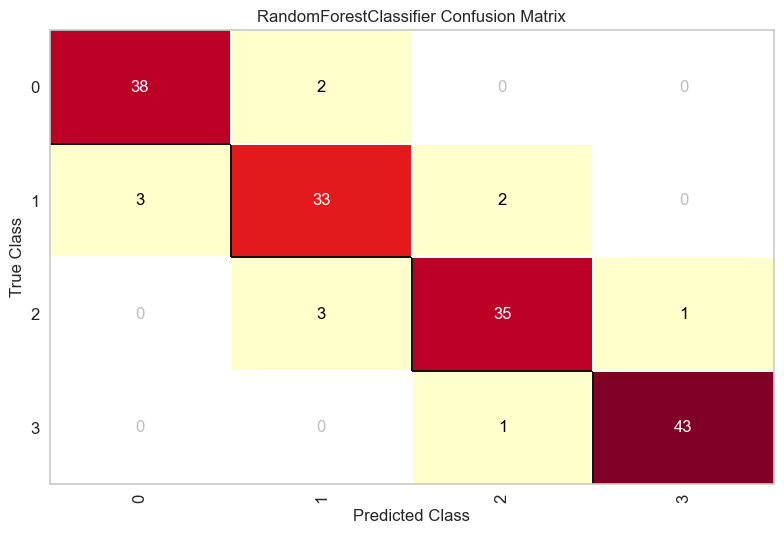

<Axes: title={'center': 'RandomForestClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [265]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(
    RF, classes=[0,1,2,3])


cm.fit(x_train, y_train)
cm.score(x_test, y_test)

cm.poof()

- According to confusion matrix model knows yellow boxes wrong. 

- RF model predict 43+35+33+38= 149 samples correctly.

- RF model predict 1+1+3+2+3+2= 12 samples uncorectly 

# - Using cross validation

In [266]:
# Check cross validation on random forest model to estimate model performance (Accuracy)
# use MinMaxScaler 
pipe2 = Pipeline([('RF', RandomForestClassifier())])
Perform_cross_val(pipe2, k=5, x=x_train, y=y_train, scoring='accuracy')

-------------------- CV for k=5, scoring=accuracy --------------------
CV mean: 0.8653382651234937
CV results: [0.86206897 0.85862069 0.86551724 0.8615917  0.87889273]



# - Using with Grid SearchCV

-To apply RF algorithm firstly I used GridSearchCV method to tune parameters. Some parameters are given below.

In [267]:
# F classifier pipeline
randomforestCLF = Pipeline(steps = [('scaler' , StandardScaler()) , 
                                    ('rf' , RandomForestClassifier(criterion = 'gini' , n_jobs = -1))])

# '''parameters'''
parameters_rf = {'rf__n_estimators':[10 , 100 ,170,200, 250 , 300 , 400 ,  500 , 700],
                 'rf__max_depth' : [ None , 4 , 8  , 10 , 12] ,
                 'rf__min_samples_split': [2,3,4,5,6],
                 'rf__max_features' : ['sqrt' , 'log2'] , 
                 'rf__max_leaf_nodes' : [0 , 4 , 8 , 10] ,
                 'rf__max_samples' : [100 , 250 , 500]}

# '''cross validation'''
RF3 = RandomizedSearchCV(randomforestCLF , parameters_rf , cv = 5 , n_iter = 50  , n_jobs = -1 )
RF3.fit(x_train , y_train)
print('Best Parameters: ',RF3.best_params_)

Best Parameters:  {'rf__n_estimators': 200, 'rf__min_samples_split': 4, 'rf__max_samples': 500, 'rf__max_leaf_nodes': 10, 'rf__max_features': 'log2', 'rf__max_depth': 8}


Now lets build the model with the best parameters we have found with the Gridsearch method.

In [268]:
# byh using  BEST PARAM
RF3 = RandomForestClassifier(max_depth =12,n_estimators=200, min_samples_split=3,
                            max_leaf_nodes=10,max_features='log2', max_samples=500, criterion='gini',random_state = 0)
RF3 = RF3.fit(x_train,y_train)
y_pred = RF3.predict(x_test)

In [269]:
# Evaluation

Report(y_test , y_pred)

Accuracy : 85.09316770186336% 

Confusion Matrix : 

[[38  2  0  0]
 [ 6 26  6  0]
 [ 0  9 30  0]
 [ 0  0  1 43]]

Classification Report : 

              precision    recall  f1-score   support

           0       0.86      0.95      0.90        40
           1       0.70      0.68      0.69        38
           2       0.81      0.77      0.79        39
           3       1.00      0.98      0.99        44

    accuracy                           0.85       161
   macro avg       0.84      0.85      0.84       161
weighted avg       0.85      0.85      0.85       161



In [270]:
print('f1 score is:', metrics.f1_score(y_test, y_pred,average="macro"))

f1 score is: 0.8440186673580502


- score of model decrease after use Grid search CV parameters 

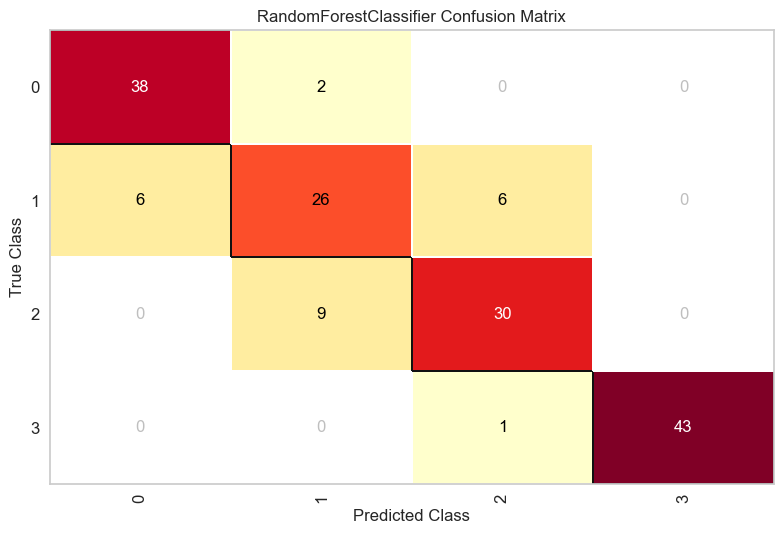

<Axes: title={'center': 'RandomForestClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [271]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(
    RF3, classes=[0,1,2,3])


cm.fit(x_train, y_train)
cm.score(x_test, y_test)

cm.poof()

- RF3 model predict 44+30+26+38= 137 samples correctly.
- RF3 model predict 9+6+6+2= 23 samples uncorectly 
- RF model(before use grid search Cv)predicted more number of samples correctly.

# 3.Support Vector Machine(SVM)

In [289]:
# Create SVM model
svm=SVC(kernel='linear',random_state = 1) 
svm.fit(x_train,y_train)
y_pred=svm.predict(x_test)

In [290]:
# Evaluation
Report(y_test , y_pred)


Accuracy : 96.8944099378882% 

Confusion Matrix : 

[[39  1  0  0]
 [ 0 38  0  0]
 [ 0  2 37  0]
 [ 0  0  2 42]]

Classification Report : 

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        40
           1       0.93      1.00      0.96        38
           2       0.95      0.95      0.95        39
           3       1.00      0.95      0.98        44

    accuracy                           0.97       161
   macro avg       0.97      0.97      0.97       161
weighted avg       0.97      0.97      0.97       161



In [291]:
print('f1 score is:', metrics.f1_score(y_test, y_pred,average="macro"))

f1 score is: 0.9687073058430138


In [292]:
print('Train')
multi_class_metrics(y_train, svm.predict(x_train))
print('\nTest')
multi_class_metrics(y_test, svm.predict(x_test))

Train
Accuracy  :  0.992
Precision :  0.992
Recall    :  0.992
f1        :  0.992

Test
Accuracy  :  0.969
Precision :  0.969
Recall    :  0.969
f1        :  0.969


- After applying sklearn library,first model has 0.96 train accuracy 

- But how can we increase these scores? let's apply gridsearch method

# -Using GridSearchCV

- To apply svm algorithm firstly I used GridSearchCV method to tune parameters. Some parameters are given below. 

In [293]:
kernel=["linear","rbf"]
gamma=["auto",0.01,0.001,0.0001,1]
decision_function_shape=["ovo","ovr"]

In [320]:
svm=SVC(random_state=1)
grid_svm=GridSearchCV(estimator=svm,cv=5,  param_grid=dict(kernel=kernel,
                                                         gamma=gamma,
                                                         decision_function_shape=decision_function_shape))
grid_svm.fit(x_train,y_train)
print("best score: ", grid_svm.best_score_)
print("best param: ", grid_svm.best_params_)

best score:  0.9709986875074573
best param:  {'decision_function_shape': 'ovo', 'gamma': 'auto', 'kernel': 'linear'}


Now lets build the model with the best parameters we have found with the Gridsearch method

In [321]:
svm1=SVC(C=0.2,decision_function_shape="ovo",gamma="auto",kernel="linear",random_state=1)
svm1.fit(x_train,y_train)
y_pred = svm1.predict(x_test)

In [322]:
# Evaluation
Report(y_test , y_pred)

Accuracy : 98.13664596273291% 

Confusion Matrix : 

[[40  0  0  0]
 [ 0 38  0  0]
 [ 0  1 38  0]
 [ 0  0  2 42]]

Classification Report : 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       0.97      1.00      0.99        38
           2       0.95      0.97      0.96        39
           3       1.00      0.95      0.98        44

    accuracy                           0.98       161
   macro avg       0.98      0.98      0.98       161
weighted avg       0.98      0.98      0.98       161



In [297]:
print('f1 score is:', metrics.f1_score(y_test, y_pred,average="macro"))

f1 score is: 0.9814456223787986


In [327]:
print('Train')
multi_class_metrics(y_train, svm1.predict(x_train))
print('\nTest')
multi_class_metrics(y_test, svm1.predict(x_test))

Train
Accuracy  :  0.991
Precision :  0.991
Recall    :  0.991
f1        :  0.991

Test
Accuracy  :  0.981
Precision :  0.981
Recall    :  0.981
f1        :  0.981


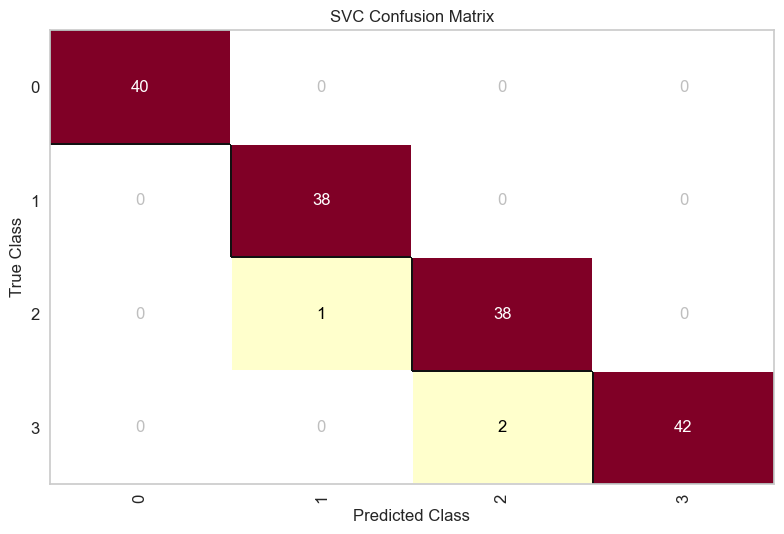

<Axes: title={'center': 'SVC Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [299]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(
    svm1, classes=[0,1,2,3])


cm.fit(x_train, y_train)
cm.score(x_test, y_test)

cm.poof()

- After applying grid search increase score.

# 4.K-Nearest Neighbour

In [313]:
# Initialize the K-Nearest Neighbors Classifier
knn = KNeighborsClassifier(n_neighbors=5) 

# Train the model
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [315]:
y_pred = knn.predict(x_test)

In [316]:
Report(y_test, y_pred)

Accuracy : 88.81987577639751% 

Confusion Matrix : 

[[37  3  0  0]
 [ 3 31  4  0]
 [ 0  3 35  1]
 [ 0  0  4 40]]

Classification Report : 

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        40
           1       0.84      0.82      0.83        38
           2       0.81      0.90      0.85        39
           3       0.98      0.91      0.94        44

    accuracy                           0.89       161
   macro avg       0.89      0.89      0.89       161
weighted avg       0.89      0.89      0.89       161



In [310]:
# Print additional metrics
print('f1 score is:', f1_score(y_test, y_pred, average="macro"))

f1 score is: 0.886625418460067


In [128]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

# Creating pipeline

In [120]:
d = pd.read_csv('traineddata.csv')
d.rename(columns={"blue": "bluetooth", "fc": "front_camera", "pc": "primary_camera", 
                         "sc_h": "screen_height", "sc_w": "screen_width"}, inplace=True)


In [123]:
X = d.drop(columns=['price_range'])
yi = d['price_range']
X_train,  X_test,yi_train, yi_test = train_test_split(X, yi, test_size=0.3, random_state=42)


In [124]:
cdf=X.select_dtypes(include="object").columns.tolist()
cdf

['bluetooth', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']

In [125]:
ndf=X.select_dtypes(exclude="object").columns.tolist()
ndf

['battery_power',
 'clock_speed',
 'front_camera',
 'int_memory',
 'm_dep',
 'mobile_wt',
 'n_cores',
 'primary_camera',
 'px_height',
 'px_width',
 'ram',
 'screen_height',
 'screen_width',
 'talk_time']

In [126]:
# Creating PPipeline
num_pipe=Pipeline([("impute", SimpleImputer()),
                 ("scaler", StandardScaler())])

num_pipe

Pipeline(steps=[('impute', SimpleImputer()), ('scaler', StandardScaler())])

In [129]:
cate_pipe=Pipeline([("impute", SimpleImputer(strategy="constant", fill_value='missing')),
                    ("ohe", OneHotEncoder(handle_unknown='ignore'))])

cate_pipe

Pipeline(steps=[('impute',
                 SimpleImputer(fill_value='missing', strategy='constant')),
                ('ohe', OneHotEncoder(handle_unknown='ignore'))])

In [130]:
from sklearn.compose import ColumnTransformer

pipe= ColumnTransformer(transformers=[
    ("numeric", num_pipe, ndf),
    ('categorical', cate_pipe, cdf)
])

pipe

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('impute', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 ['battery_power', 'clock_speed',
                                  'front_camera', 'int_memory', 'm_dep',
                                  'mobile_wt', 'n_cores', 'primary_camera',
                                  'px_height', 'px_width', 'ram',
                                  'screen_height', 'screen_width',
                                  'talk_time']),
                                ('categorical',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(fill_value='missing',
                                                                strategy='constant')),
                                                 ('ohe',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['bluetooth', 'dual_sim', 'four_g', 'three_g',
                                  'touch_screen', 'wifi'])])

# Stacking Ensemble Technique

In [131]:
#Stacking meta-estimator
from sklearn.ensemble import StackingClassifier

#Base estimators
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

#Meta Learner or the final estimator
from sklearn.linear_model import LogisticRegression

In [132]:
#Build the pipeline for individual base models and store them in a list
base_models = list()

svm = Pipeline(
    steps = [
      ('preprocessor', pipe), #Preprocessing
      ('classifier'  , LinearSVC())  #Model
    ]
)
base_models.append(('svm',svm))

knn = Pipeline(
    steps = [
      ('preprocessor', pipe), #Preprocessing
      ('classifier'  , KNeighborsClassifier(n_neighbors=4))  #Model
    ]
)
base_models.append(('knn',knn))

dtree = Pipeline(
    steps = [
      ('preprocessor', pipe), #Preprocessing
      ('classifier'  , DecisionTreeClassifier())  #Model
    ]
)
base_models.append(('dtree',dtree))

In [133]:
#Create the final estimator
meta_learner = LogisticRegression()

In [134]:
#Asemble the models for the Stacking Ensemble
stack_model = StackingClassifier(estimators=base_models,
                                 final_estimator=meta_learner,
                                 cv=10)

stack_model.fit(X_train, yi_train)

StackingClassifier(cv=10,
                   estimators=[('svm',
                                Pipeline(steps=[('preprocessor',
                                                 ColumnTransformer(transformers=[('numeric',
                                                                                  Pipeline(steps=[('impute',
                                                                                                   SimpleImputer()),
                                                                                                  ('scaler',
                                                                                                   StandardScaler())]),
                                                                                  ['battery_power',
                                                                                   'clock_speed',
                                                                                   'front_camera',
                                                                                   'int_memory',
                                                                                   'm_dep',
                                                                                   'mobile_wt',
                                                                                   'n_cores',
                                                                                   'primary_camera',
                                                                                   'px_height',
                                                                                   'px_width',
                                                                                   'ram',
                                                                                   'screen_height',
                                                                                   'screen...
                                                                                   'px_width',
                                                                                   'ram',
                                                                                   'screen_height',
                                                                                   'screen_width',
                                                                                   'talk_time']),
                                                                                 ('categorical',
                                                                                  Pipeline(steps=[('impute',
                                                                                                   SimpleImputer(fill_value='missing',
                                                                                                                 strategy='constant')),
                                                                                                  ('ohe',
                                                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                                                  ['bluetooth',
                                                                                   'dual_sim',
                                                                                   'four_g',
                                                                                   'three_g',
                                                                                   'touch_screen',
                                                                                   'wifi'])])),
                                                ('classifier',
                                                 DecisionTreeClassifier())]))],
                   final_estimator=LogisticRegression())

Report : 
              precision    recall  f1-score   support

         low       0.97      0.95      0.96       148
      medium       0.99      0.99      0.99       151
        high       0.98      0.98      0.98       146
    veryhigh       0.96      0.99      0.97       155

    accuracy                           0.98       600
   macro avg       0.98      0.98      0.98       600
weighted avg       0.98      0.98      0.98       600



<Axes: >

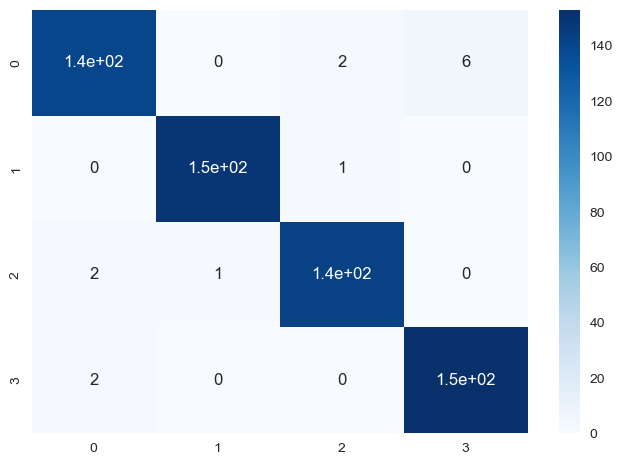

In [136]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
y_pred = stack_model.predict(X_test)
# print(y_pred)

#Summarise the fit of the model
report = classification_report(yi_test, y_pred, target_names=['low','medium','high', 'veryhigh'])
print("Report : \n{}".format(report))

#Confusion Matrix
cm = confusion_matrix(yi_test, y_pred)
# print(cm)
sns.heatmap(cm,annot=True,cmap='Blues')

# Gradient Boosting Technique

In [138]:
from sklearn.ensemble import GradientBoostingClassifier

gboosting_model = GradientBoostingClassifier(n_estimators=500)

#creating pipeline model for gradient boosting
gboosting_pipeline = Pipeline(steps=[
                              ('preprocessor', pipe), #Preprocessing
                              ('classifier'  , gboosting_model) ] #Model
                              )


#Training the model using pipeline
gboosting_pipeline.fit(X_train, yi_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['battery_power',
                                                   'clock_speed',
                                                   'front_camera', 'int_memory',
                                                   'm_dep', 'mobile_wt',
                                                   'n_cores', 'primary_camera',
                                                   'px_height', 'px_width',
                                                   'ram', 'screen_height',
                                                   'screen_width',
                                                   'talk_time']),
                                                 ('categorical',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['bluetooth', 'dual_sim',
                                                   'four_g', 'three_g',
                                                   'touch_screen', 'wifi'])])),
                ('classifier', GradientBoostingClassifier(n_estimators=500))])

Report : 
              precision    recall  f1-score   support

         low       0.85      0.82      0.84       148
      medium       0.97      0.93      0.95       151
        high       0.86      0.90      0.88       146
    veryhigh       0.90      0.92      0.91       155

    accuracy                           0.90       600
   macro avg       0.90      0.89      0.89       600
weighted avg       0.90      0.90      0.90       600



<Axes: >

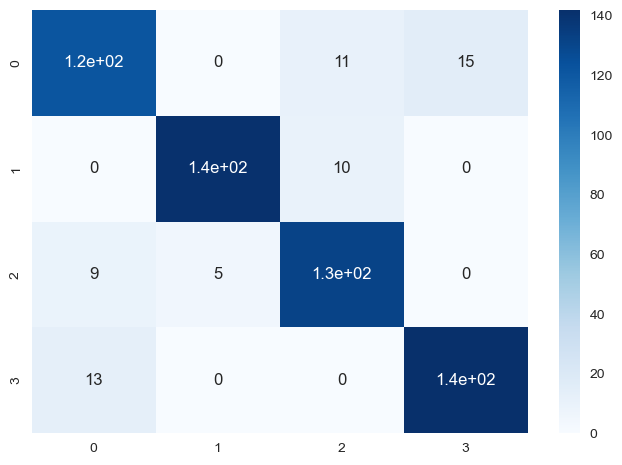

In [139]:
y_pred = gboosting_pipeline.predict(X_test)
# print(y_pred)

#Summarise the fit of the model
report = classification_report(yi_test, y_pred, target_names=['low','medium','high', 'veryhigh'])
print("Report : \n{}".format(report))

#Confusion Matrix
cm = confusion_matrix(yi_test, y_pred)
# print(cm)
sns.heatmap(cm,annot=True,cmap='Blues')

In [140]:
# hyperparameter tuning using grid searchcv
param_grid = {
    'classifier__n_estimators': [100, 200, 500],
    'classifier__learning_rate': [0.01, 0.1, 0.2],
    'classifier__max_depth': [3, 4, 5]
}

# Set up Grid Search
grid_search = GridSearchCV(gboosting_pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)



In [143]:
# Fit the model
grid_search.fit(X_train, yi_train)

# Get the best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best accuracy score: ", grid_search.best_score_)
print("Best accuracy score: ", grid_search.best_estimator_)

Best parameters found:  {'classifier__learning_rate': 0.2, 'classifier__max_depth': 5, 'classifier__n_estimators': 200}
Best accuracy score:  0.8957142857142857
Best accuracy score:  Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['battery_power',
                                                   'clock_speed',
                                                   'front_camera', 'int_memory',
                                                   'm_dep', 'mobile_wt',
                                                   'n_cores', 'primary_camera',
                            

              precision    recall  f1-score   support

           l       0.86      0.84      0.85       148
           m       0.94      0.93      0.94       151
           h       0.85      0.89      0.87       146
          vh       0.93      0.91      0.92       155

    accuracy                           0.89       600
   macro avg       0.89      0.89      0.89       600
weighted avg       0.89      0.89      0.89       600



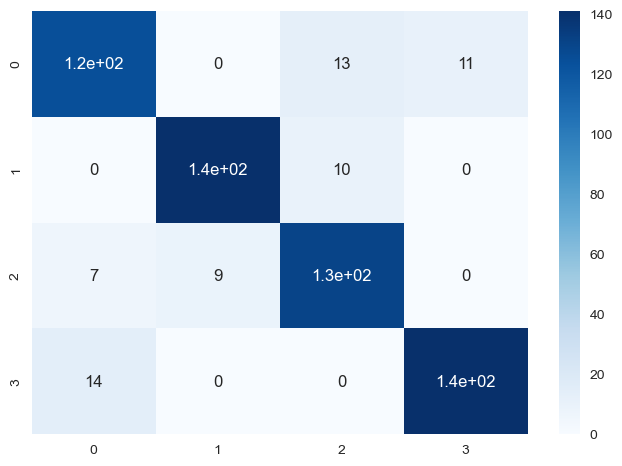

In [146]:
# Predict and evaluate
y_pred = grid_search.best_estimator_.predict(X_test)
print(classification_report(yi_test, y_pred, target_names=['l','m','h','vh']))
cm = confusion_matrix(yi_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues')
plt.show()

# Best Model

In [318]:
All_models= {'Model':['DTs' , 'RF', 'SVM'],
             'Accuracy': [88.20,92.54,98.14 ],
            'f1_score': [ 87.92,92.32,98.20 ]}
             
comparison = pd.DataFrame(All_models)
comparison 

,Model,Accuracy,f1_score
0,DTs,88.20,87.92
1,RF,92.54,92.32
2,SVM,98.14,98.20


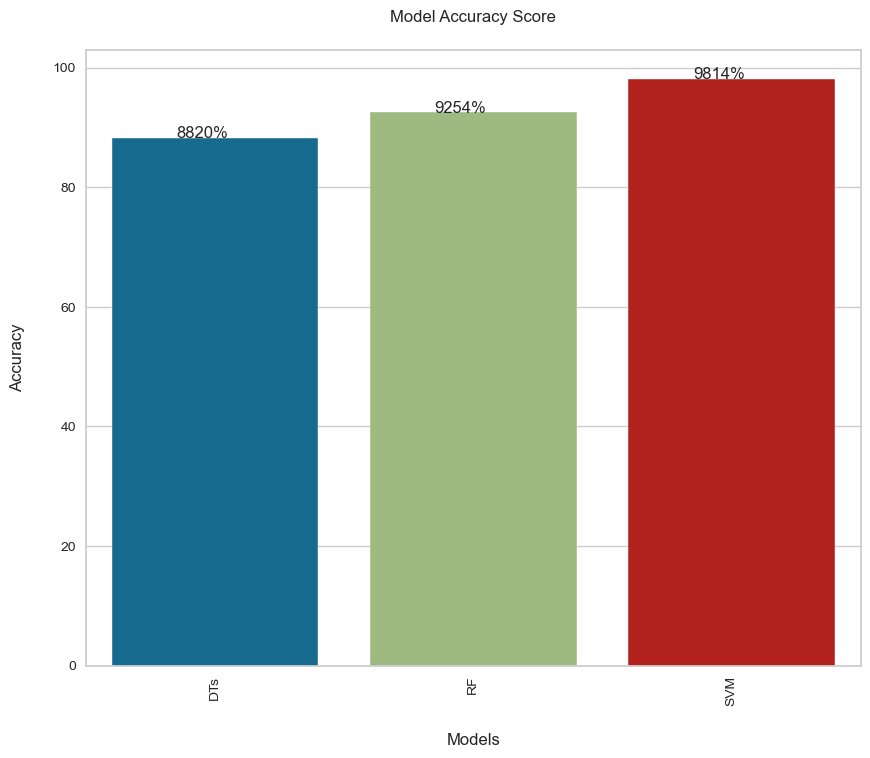

In [205]:
# compare Accuracy in all models
fig,ax=plt.subplots(figsize=(10,8))
sns.barplot(x='Model',y='Accuracy', data=comparison )
ax.set_title("Model Accuracy Score",pad=20)
ax.set_xlabel("Models",labelpad=20)
ax.set_ylabel("Accuracy",labelpad=20)
plt.xticks(rotation=90)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0%}'.format(height), (x+0.25, y + height + 0.01))

 - Accuracy score is more in Svm model. the SVM algorithm is the best for this model

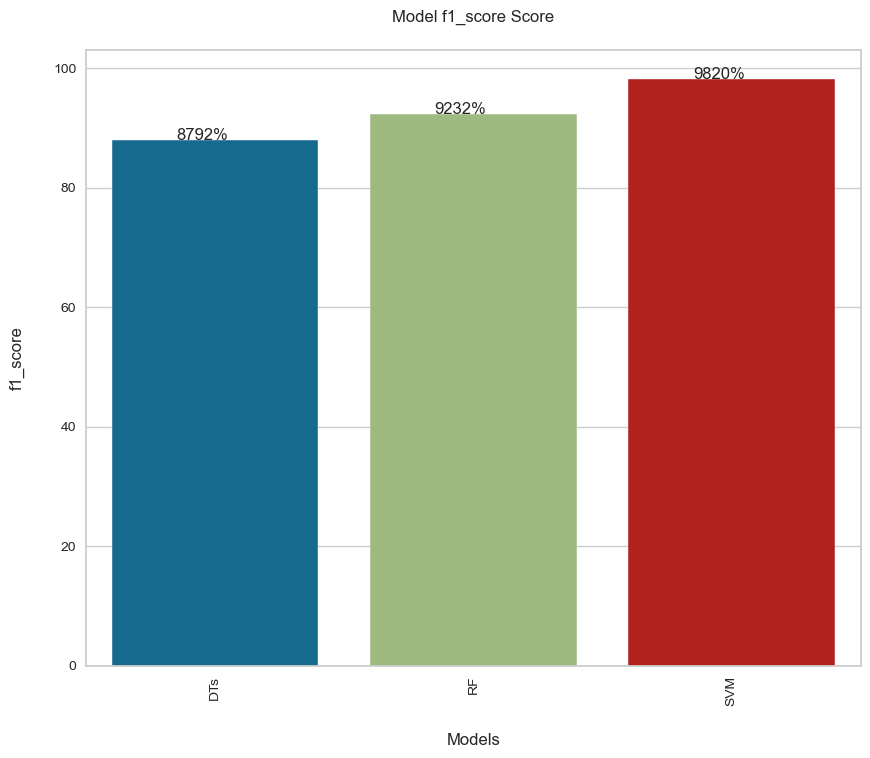

In [206]:
# compare F1_score in all models
fig,ax=plt.subplots(figsize=(10,8))
sns.barplot(x='Model',y='f1_score', data=comparison )
ax.set_title("Model f1_score Score",pad=20)
ax.set_xlabel("Models",labelpad=20)
ax.set_ylabel("f1_score",labelpad=20)
plt.xticks(rotation=90)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0%}'.format(height), (x+0.25, y + height + 0.01))

- F1_score  is more in Svm model. the SVM algorithm is the best for this case study. so we predict  data with svm model

In [ ]:
import pickle

# Save the model to a file
model_filename = 'mobilesvm_model.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(svm1, file)

print(f"Model saved as {model_filename}")

In [ ]:
model = pickle.load(open("mobilesvm_model.pkl", "rb"))
# model

In [213]:
# # perdictions

# #creat a datafram from 4 smples of train data with price range 0,1,2,3
# sample_pred= pd.DataFrame ({'battery_power':[563,1821,794,510],'blue':[1,1,1,1],'clock_speed':[0.5,1.2,0.5,2.0],
#                           'dual_sim':[1,0,1,1],'fc':[2,13,0,5] ,'four_g':[1,1,1,1],'int_memory':[41,44,2,45],
#                             'm_dep':[0.9,0.6,0.8,0.9],'mobile_wt':[145,141,106,168], 'n_cores':[5,2,6,6], 
#                             'pc':[6,14,14,16],'px_height':[1263,1208,122,483],'px_width':[1716,1212,1890,754],
#                             'ram':[2603,1411,668,3919],'sc_h':[11,8,13,19],'sc_w':[2,2,4,4],'talk_time':[9,15,19,2],
#                             'three_g':[1,1,1,1],'touch_screen':[1,1,1,1], 'wifi':[0,0,0,1],'price_range':[2,1,0,3]})
                            
# sample_pred      